In [106]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [107]:
class Model(nn.Module):
    
    def __init__(self, in_features=0, out_feature=0, hidden_features_1=0, hidden_features_2=0):
        super().__init__()
        self.fc1 = nn.Linear(in_features, hidden_features_1)
        self.fc2 = nn.Linear(hidden_features_1,hidden_features_2)
        self.out = nn.Linear(hidden_features_2, out_feature)
            
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [108]:
df = pd.read_csv("/Users/sakshigoyal/Desktop/Udemy_pytorch/PYTORCH_NOTEBOOKS/Data/iris.csv")
#df.head()

In [109]:

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('target', axis=1).values, df['target'].values, test_size=0.2, random_state =33)

In [110]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_test = torch.LongTensor(Y_test)
Y_train = torch.LongTensor(Y_train)

In [111]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [112]:
# FOR REDO
torch.manual_seed(4)
model = Model(4,3,8,9)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [113]:
epochs=100
losses = []
for i in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, Y_train)
    losses.append(loss.item())
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch:  1  loss: 1.08040535
epoch: 11  loss: 0.96687949
epoch: 21  loss: 0.72590250
epoch: 31  loss: 0.47492674
epoch: 41  loss: 0.33777791
epoch: 51  loss: 0.21720311
epoch: 61  loss: 0.12907785
epoch: 71  loss: 0.08912650
epoch: 81  loss: 0.07264634
epoch: 91  loss: 0.06489738


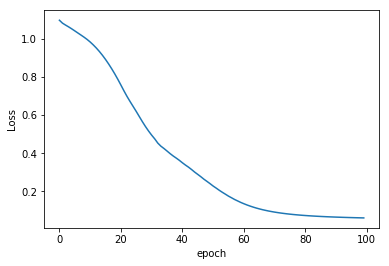

In [114]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [115]:
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, Y_test)
    print(f'loss : {loss:.8f}')
    

loss : 0.06246214


In [116]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model.forward(data)
        print(f'ind : {i+1:d}. {str(y_pred):38} target:{Y_test[i]}')
        if torch.argmax(y_pred) == Y_test[i]:
            correct +=1
            
print(f'{correct} out of {len(X_test)} is correct : {correct*100/len(X_test):0.6f}%')
print("{} out of {} is correct: {:.6} %".format(correct, len(X_test), correct*100/len(X_test)))
        

ind : 1. tensor([-0.3355,  7.3630,  1.3783])    target:1
ind : 2. tensor([0.2775, 8.1554, 0.4269])       target:1
ind : 3. tensor([ 11.9970,   6.1847, -19.1976]) target:0
ind : 4. tensor([-2.0187,  7.9664,  4.2447])    target:1
ind : 5. tensor([-6.1348,  7.9516, 11.0913])    target:2
ind : 6. tensor([-10.2635,   8.3101,  17.9998]) target:2
ind : 7. tensor([ 12.0542,   6.4321, -19.2909]) target:0
ind : 8. tensor([ 12.9507,   6.4819, -20.7540]) target:0
ind : 9. tensor([-5.7722,  8.2435, 10.5083])    target:2
ind : 10. tensor([-7.8867,  8.6126, 14.0731])    target:2
ind : 11. tensor([-8.7055,  8.6074, 15.4337])    target:2
ind : 12. tensor([ 11.6358,   5.8167, -18.6219]) target:0
ind : 13. tensor([-8.1009,  8.2331, 14.3888])    target:2
ind : 14. tensor([-2.0791,  7.7752,  4.3188])    target:1
ind : 15. tensor([-6.0828,  8.3916, 11.0586])    target:2
ind : 16. tensor([0.1360, 7.8660, 0.6409])       target:1
ind : 17. tensor([-4.0875,  7.7217,  7.6642])    target:2
ind : 18. tensor([ 13.1

In [117]:
# save model
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

In [118]:
#load model
new_model = Model(4,3,8,9)
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [119]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])
target_pred = torch.argmax(model(mystery_iris))
target_pred

tensor(0)

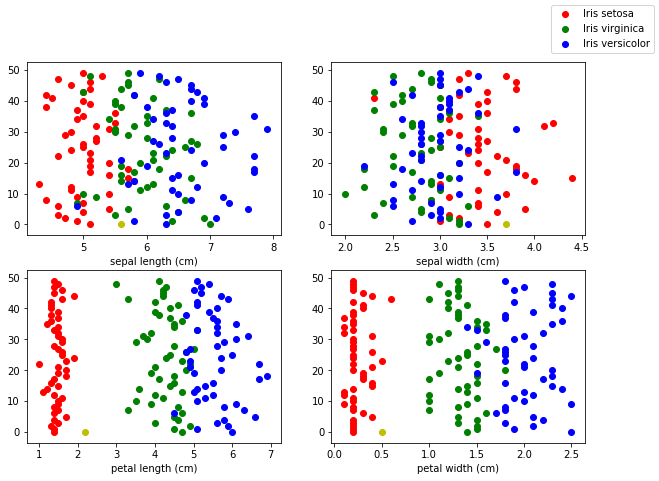

In [120]:
f, axs = plt.subplots(2,2,figsize=(10,7))
labels = ['Iris setosa','Iris virginica','Iris versicolor']
feature = ['sepal length (cm)', 'sepal 3 (cm)', 'petal length (cm)', 'petal width (cm)']
colors = ['r', 'g', 'b']
for j, ax in enumerate(axs.flat):
    for i in range(3):
        ax.scatter(df[df['target'] == i][feature[j]], range(len(df[df['target'] == i])), color=colors[i])
        ax.set(xlabel=feature[j])
    ax.scatter(mystery_iris[j], target_pred, color='y')
f.legend(labels=labels,loc='best')
plt.show() 